# Bias-Variance Tradeoff 

In [119]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### - Create a dataset

In [120]:
np.random.seed(69)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.1, size=100)  # Add some noise to the sine function

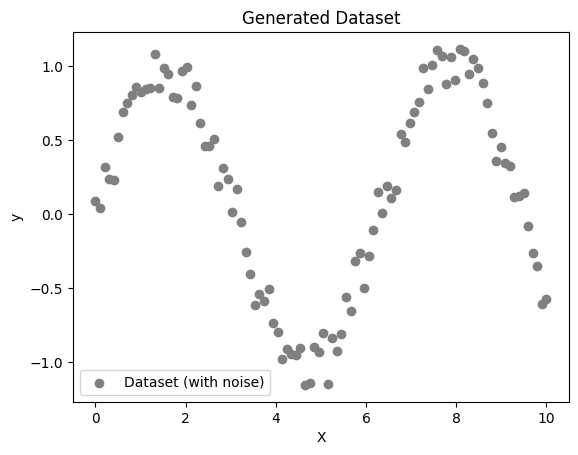

In [121]:
# Visualize the dataset
plt.scatter(X, y, color="gray", label="Dataset (with noise)")
plt.title("Generated Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [122]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


### Model 1: Linear regression with underfitting (<<bias)

In [123]:
# High bias
model_bias = LinearRegression()
model_bias.fit(X_train, y_train)
y_pred_bias = model_bias.predict(X_test)

### Model 2: Decision Tree Regressor with overfitting (<<variance)

In [124]:
# A deep tree is prone to overfitting
model_variance = DecisionTreeRegressor(max_depth=10)  
model_variance.fit(X_train, y_train)
y_pred_variance = model_variance.predict(X_test)

### Calculate the MSE (Mean Squared Error) for both models
<img src="../images/mse.jpg" width=360 height=200 />


In [125]:
mse_bias = mean_squared_error(y_test, y_pred_bias)
mse_variance = mean_squared_error(y_test, y_pred_variance)
print(f"\nLinear Regression MSE: {mse_bias:.4f}")
print(f"Decision Tree MSE: {mse_variance:.4f}")


Linear Regression MSE: 0.3100
Decision Tree MSE: 0.0298


### Visualization of the predictions

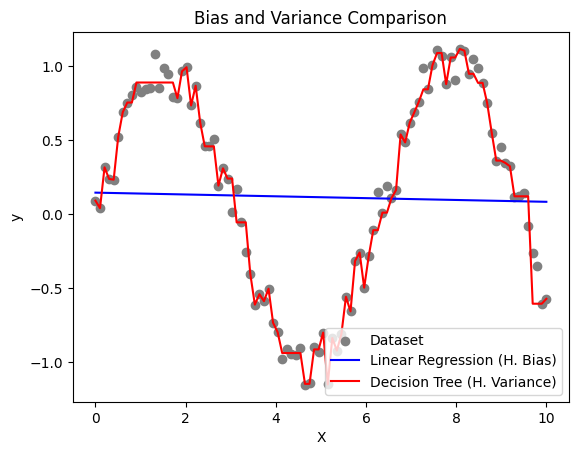

In [126]:

plt.scatter(X, y, color="gray", label="Dataset")
plt.plot(X, model_bias.predict(X), label="Linear Regression (H. Bias)", color="blue")
plt.plot(X, model_variance.predict(X), label="Decision Tree (H. Variance)", color="red")
plt.title("Bias and Variance Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### How to solve the problem?
Now that we have ilustrate the problem with bias-variance Tradeoff we can step further and see how to solve the problem.

### Model 3: Decision Tree with Depth Regularization

In [127]:
# Regularized depth
depth = 6
optimized_tree = DecisionTreeRegressor(max_depth=depth) 
optimized_tree.fit(X_train, y_train)
y_pred_tree = optimized_tree.predict(X_test)

In [128]:
# Evaluate the model
mse_optimized_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Optimized Decision Tree MSE: {mse_optimized_tree:.4f}")

Optimized Decision Tree MSE: 0.0300


### Visaulize the predictions (part. 2)

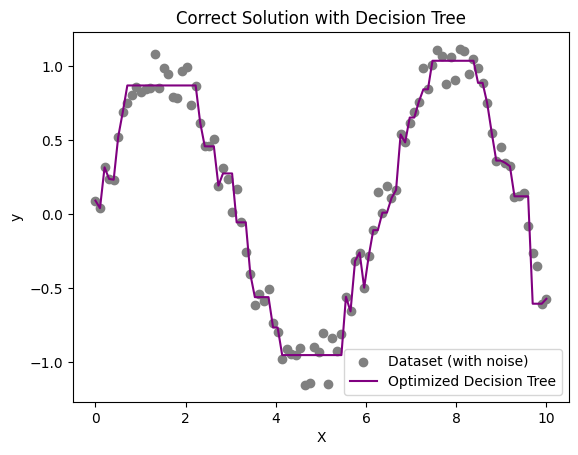

In [129]:
plt.scatter(X, y, color="gray", label="Dataset (with noise)")
plt.plot(X, optimized_tree.predict(X), label="Optimized Decision Tree", color="purple")
plt.title("Correct Solution with Decision Tree")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

This is a little bit improved than the previous one but not as great as we want, so perhaps this simple approach for regularization depth of the decision tree we can be a little bit more creative and think about a better method to reach the reconstruction of the sine wave.

### Model 4: Polynomial Regression

In [130]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [131]:
# For a better understanding of the concept and a simple computational effort let's chose a small degree for our polynom
degree = 5
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polynomial_model.fit(X_train, y_train)
y_pred_poly = polynomial_model.predict(X_test)

Polynomial Regression MSE (degree 5): 0.0407


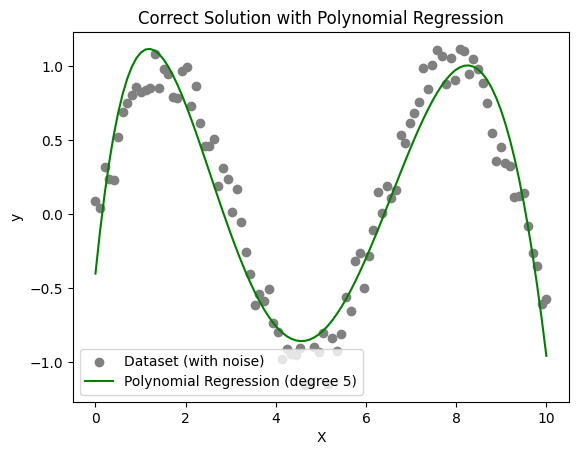

In [132]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE (degree {degree}): {mse_poly:.4f}")

# Plot the predictions
plt.scatter(X, y, color="gray", label="Dataset (with noise)")
plt.plot(X, polynomial_model.predict(X), label=f"Polynomial Regression (degree {degree})", color="green")
plt.title("Correct Solution with Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Conclusion
I already think that you must find the best solution for the problem you have not a general one so I recommand to do a little research before step into the implementation.